In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = '../VGG_ILSVRC_19_layers_deploy.prototxt'
PRETRAINED = '../base.caffemodel'
LABEL_FILE = '../../data/ilsvrc12/synset_words.txt'

label = open(LABEL_FILE).readlines()

In [4]:
caffe.set_mode_gpu()
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

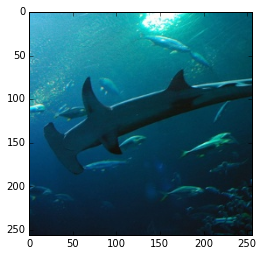

In [5]:
IMAGE_FILE = './test.JPEG'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

 prediction shape: (1000,)
predicted class: n01494475 hammerhead, hammerhead shark



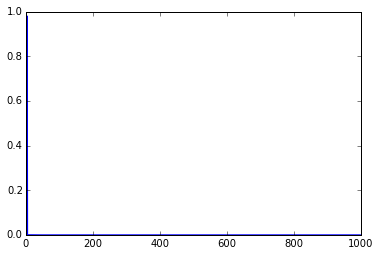

In [13]:
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
print 'prediction shape:', prediction[0].shape
plt.plot(prediction[0])
print 'predicted class:', label[prediction[0].argmax()]